<a href="https://colab.research.google.com/github/nazalan/OnalloLaboratorium/blob/main/ExchangeRateTimeSeriesEurHuf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Euro to HUF Conversion - Time Series Analysis

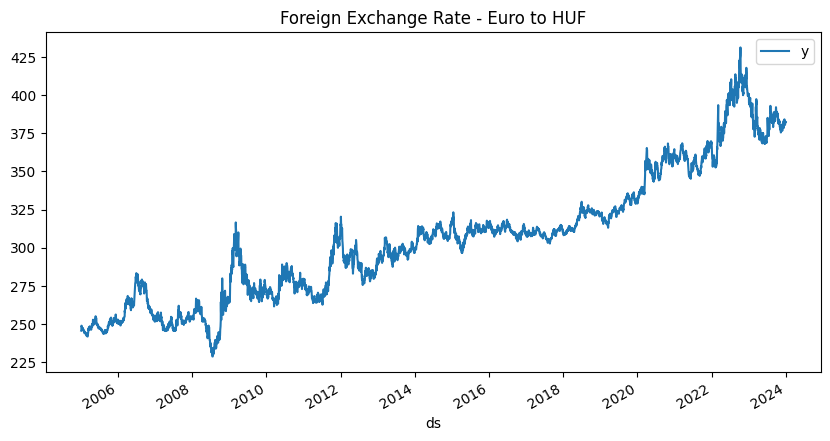

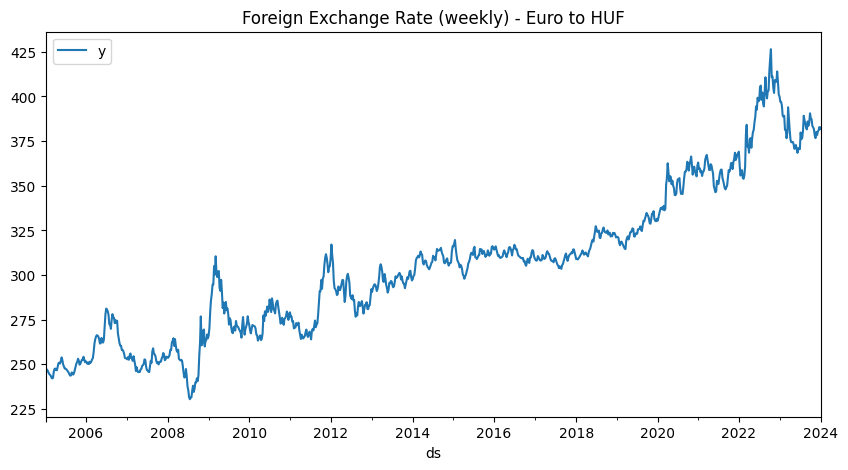

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1vph7cth/rqgtq362.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1vph7cth/k3nqrtc3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93474', 'data', 'file=/tmp/tmp1vph7cth/rqgtq362.json', 'init=/tmp/tmp1vph7cth/k3nqrtc3.json', 'output', 'file=/tmp/tmp1vph7cth/prophet_modelh35_l06x/prophet_model-20240304151217.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:12:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:12:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


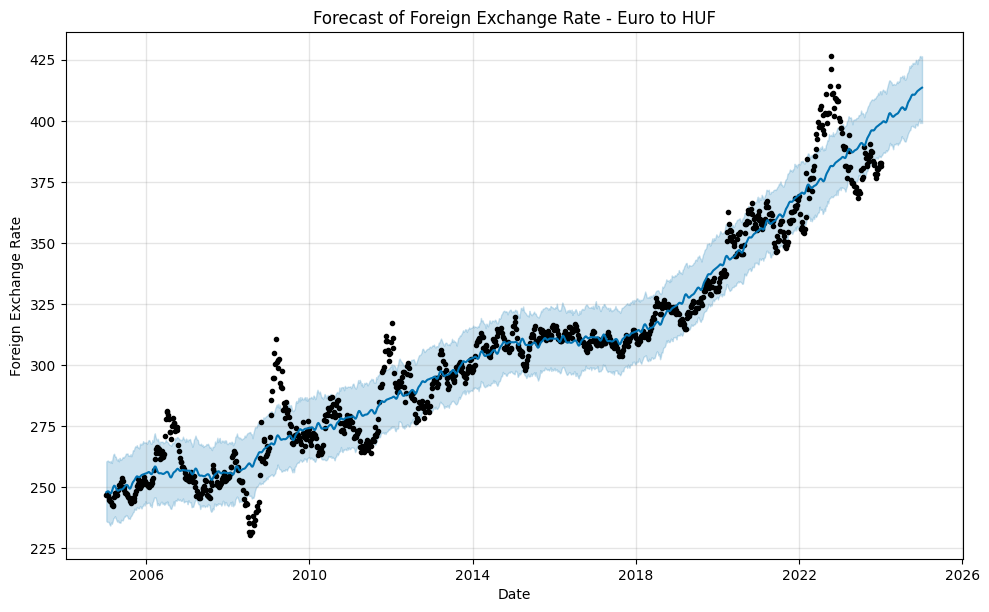

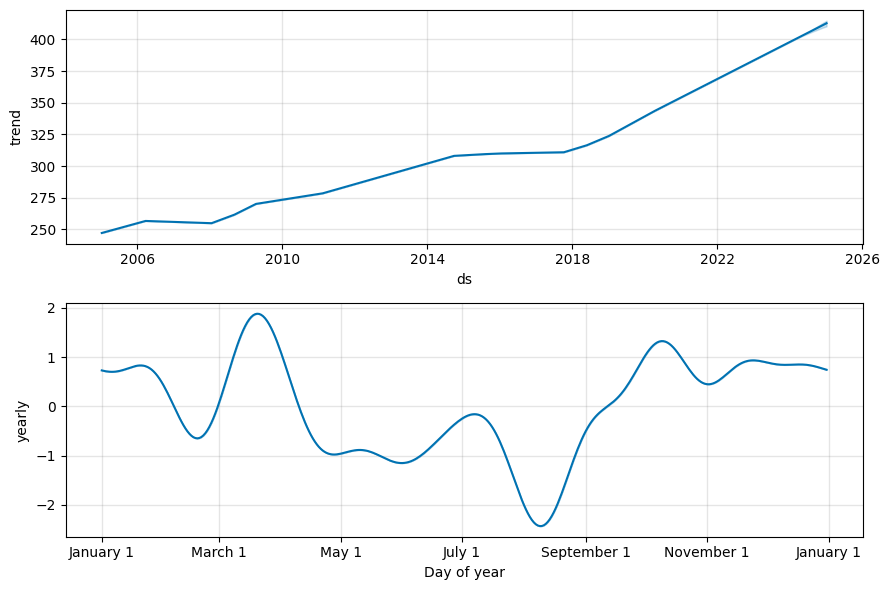

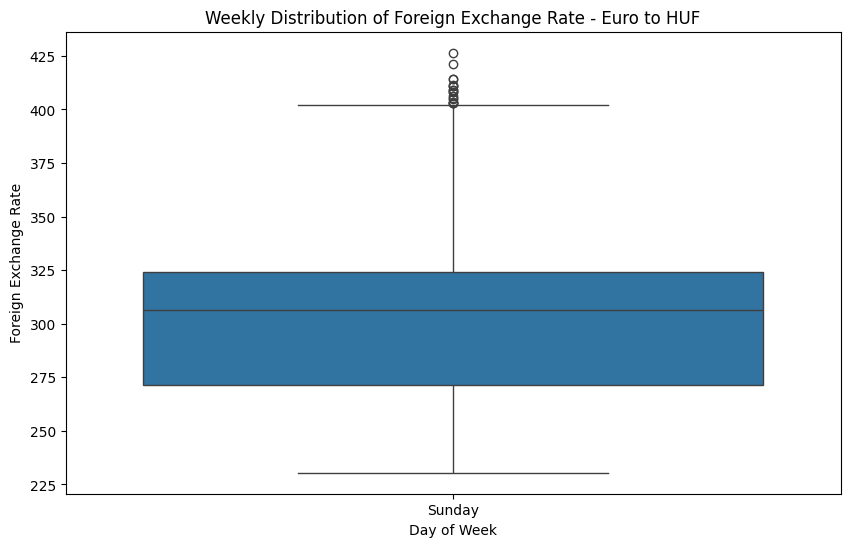

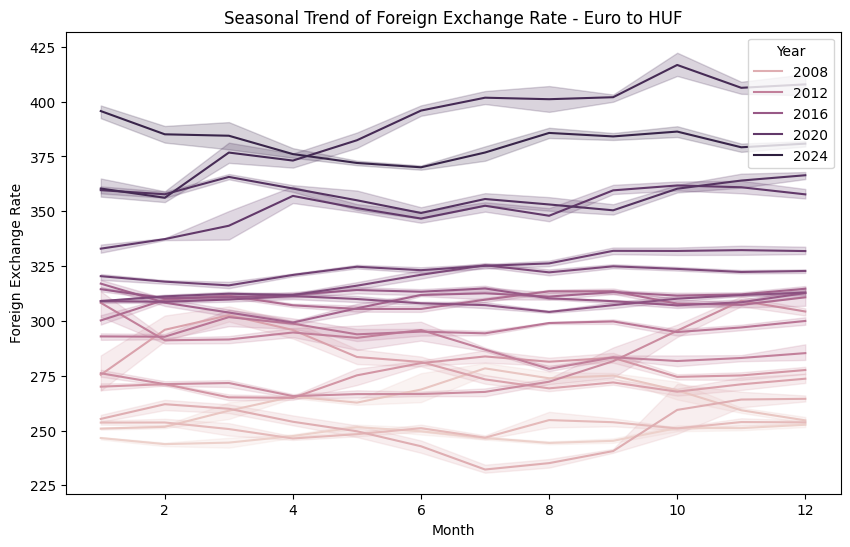

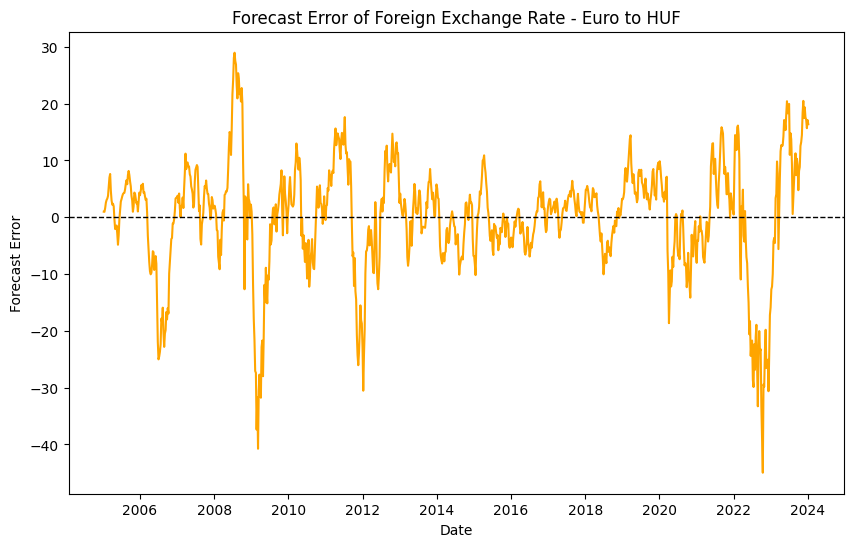

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from prophet import Prophet
%matplotlib inline
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller
from math import sqrt
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Munkakönyvtár megváltoztatása, adatok beolvasása, szükséges oszlopok kiválasztása, oszlop átnevezése, dátumformátum átalakítása és adatok megjelenítése
os.chdir('/content/sample_data')
table_sum = pd.read_csv('EUR_HUF Historical Data 05-24.csv')
df = table_sum[["Date", "Price"]]
df.rename(columns={"Price": "Value"}, inplace=True)
df["Date"] = pd.to_datetime(df["Date"], format="%m/%d/%Y").dt.strftime("%Y-%m-%d")

# Data Processing
# Dátumformátum átalakítása és időindex létrehozása
df['Date'] = pd.to_datetime(df['Date'])
df.rename(columns={'Date': 'ds', 'Value': 'y'}, inplace=True)

# Data Processing & Visualization
# Adatok megjelenítése vonaldiagramon
df.plot(x='ds', y='y', figsize=(10, 5))
plt.title('Foreign Exchange Rate - Euro to HUF')
plt.show()

# Heti átlagok kiszámítása és megjelenítése
df_week = df.resample('W', on='ds').mean().reset_index()

df_week.plot(x='ds', y='y', figsize=(10, 5))
plt.title('Foreign Exchange Rate (weekly) - Euro to HUF')
plt.show()

# Prophet model létrehozása és illesztése
model = Prophet()
model.fit(df_week)

# Heti átlagok előrejelzése
future = model.make_future_dataframe(periods=52, freq='W')
forecast = model.predict(future)

# Megjelenítés
model.plot(forecast, xlabel='Date', ylabel='Foreign Exchange Rate')
plt.title('Forecast of Foreign Exchange Rate - Euro to HUF')
plt.show()

# Trend és szezonális komponens megjelenítése
model.plot_components(forecast)
plt.show()

# További grafikonok
# 1. Heti átlagok eloszlása az idő függvényében
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_week['ds'].dt.strftime('%A'), y=df_week['y'])
plt.title('Weekly Distribution of Foreign Exchange Rate - Euro to HUF')
plt.xlabel('Day of Week')
plt.ylabel('Foreign Exchange Rate')
plt.show()


# 2. Szezonális alakulás az év függvényében
plt.figure(figsize=(10, 6))
sns.lineplot(x=df_week['ds'].dt.month, y=df_week['y'], hue=df_week['ds'].dt.year)
plt.title('Seasonal Trend of Foreign Exchange Rate - Euro to HUF')
plt.xlabel('Month')
plt.ylabel('Foreign Exchange Rate')
plt.legend(title='Year')
plt.show()

# 3. Az előrejelzés hibájának megjelenítése
plt.figure(figsize=(10, 6))
plt.plot(forecast['ds'], forecast['yhat'] - df_week['y'], color='orange')
plt.axhline(0, linestyle='--', color='black', linewidth=1)
plt.title('Forecast Error of Foreign Exchange Rate - Euro to HUF')
plt.xlabel('Date')
plt.ylabel('Forecast Error')
plt.show()
